# Neural Networks on MNIST Dataset using Keras
### BSc Software Engineering – AI/ML Practical Lab

**Objectives:**
- Understand the workflow of neural networks on image data using Keras
- Experiment with batch size, epochs, hidden layers, and activation functions
- Visualize overfitting and underfitting
- Practice model evaluation and hyperparameter tuning

## Step 1: Import Required Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Step 2: Load and Explore MNIST Dataset

Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


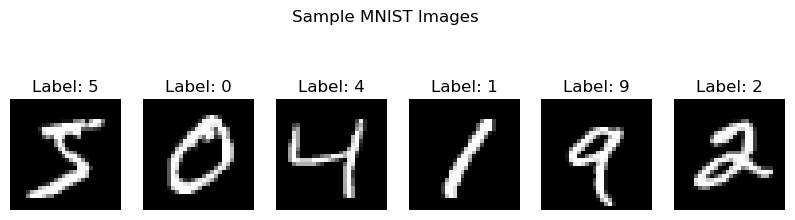

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Display shape and a few images
print('Training data shape:', X_train.shape)
print('Test data shape:', X_test.shape)

plt.figure(figsize=(10,3))
for i in range(6):
    plt.subplot(1,6,i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f'Label: {y_train[i]}')
    plt.axis('off')
plt.suptitle('Sample MNIST Images')
plt.show()

## Step 3: Preprocessing

In [3]:
# Normalize and reshape
X_train = X_train / 255.0
X_test = X_test / 255.0

# One-hot encode labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)


## Step 4: Define Neural Network Model

In [4]:
# You can change hidden layers, neurons, and activation functions here for experimentation
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='relu'))  # Try 'tanh', 'sigmoid'
# model.add(Dense(64, activation='relu'))  # Uncomment to add another hidden layer
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary
model.summary()

2025-07-02 11:41:42.833086: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2025-07-02 11:41:42.833149: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-07-02 11:41:42.833163: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2025-07-02 11:41:42.833237: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-07-02 11:41:42.833271: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Step 5: Train the Model

In [5]:
# You can experiment with batch_size and epochs
history = model.fit(X_train, y_train_cat, validation_split=0.2, epochs=15, batch_size=64)

Epoch 1/15


2025-07-02 11:41:51.502825: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


744/750 [============================>.] - ETA: 0s - loss: 0.3956 - accuracy: 0.8879

2025-07-02 11:41:58.800064: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


750/750 [==============================] - 9s 8ms/step - loss: 0.3952 - accuracy: 0.8880 - val_loss: 0.2950 - val_accuracy: 0.9156
Epoch 2/15
750/750 [==============================] - 6s 8ms/step - loss: 0.3022 - accuracy: 0.9154 - val_loss: 0.2892 - val_accuracy: 0.9222
Epoch 3/15
750/750 [==============================] - 6s 9ms/step - loss: 0.2954 - accuracy: 0.9180 - val_loss: 0.2856 - val_accuracy: 0.9243
Epoch 4/15
750/750 [==============================] - 6s 8ms/step - loss: 0.2935 - accuracy: 0.9186 - val_loss: 0.2834 - val_accuracy: 0.9222
Epoch 5/15
750/750 [==============================] - 6s 9ms/step - loss: 0.2957 - accuracy: 0.9178 - val_loss: 0.3051 - val_accuracy: 0.9189
Epoch 6/15
750/750 [==============================] - 6s 9ms/step - loss: 0.2983 - accuracy: 0.9178 - val_loss: 0.3027 - val_accuracy: 0.9197
Epoch 7/15
750/750 [==============================] - 6s 9ms/step - loss: 0.3001 - accuracy: 0.9174 - val_loss: 0.3145 - val_accuracy: 0.9179
Epoch 8/15
750/75

## Step 6: Visualize Learning Curves to Observe Overfitting/Underfitting

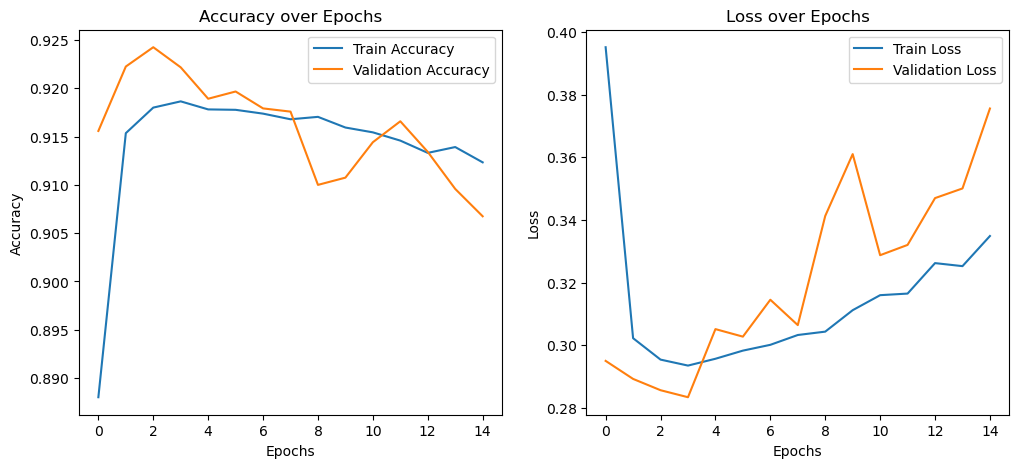

In [6]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss over Epochs')

plt.show()

## Step 7: Evaluate Model on Test Data

In [7]:
test_loss, test_accuracy = model.evaluate(X_test, y_test_cat)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

313/313 [==============================] - 2s 8ms/step - loss: 0.3822 - accuracy: 0.9066
Test Loss: 0.3822
Test Accuracy: 0.9066


## Step 8: Confusion Matrix on Test Predictions

106/313 [=========>....................] - ETA: 0s

2025-07-02 11:44:03.377490: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 1ms/step


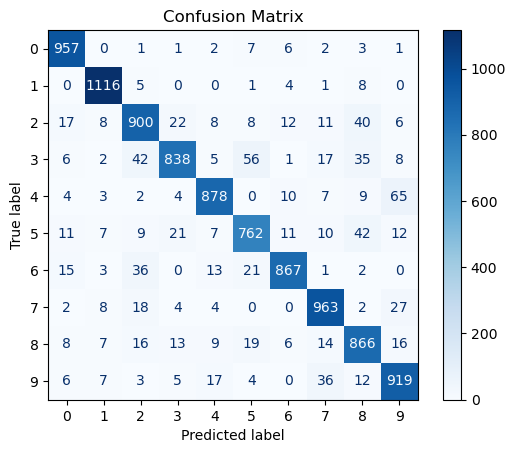

In [8]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

## Step 9: Practice Exercises
**Try the following to deepen your understanding:**
- Change `batch_size` to 32, 128, and observe training speed and accuracy.
- Change `epochs` to 5, 20 and check for overfitting.
- Change activation function from `'relu'` to `'tanh'` or `'sigmoid'`.
- Add another hidden layer and see if accuracy improves.
- Try reducing the number of neurons in the hidden layer to 64 or 32 and observe changes.
- Note observations for each change and discuss in your lab report.